# [Model] Data Analytics Test - iFood
###### [By Israel Mendes](https://github.com/israelmendez232)

This notebook were generated by [Databricks](https://databricks.com/). The idea is to replicate more possible of the enviroment of the Data Analytics from iFood. 

The main library used here is [PyCaret](https://pycaret.readthedocs.io/en/latest/) to generate the model and tuning, because is very pratical and productive.
TODO: remove later
- Main article to start: https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46
- DOC focused on the Classification: https://pycaret.org/classification/
- Main DOC: https://pycaret.readthedocs.io/en/latest/index.html
- Jupyter notebook using PyCaret: https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Classification.ipynb

In [27]:
import pandas as pd
from pycaret.classification import *

df = pd.read_csv("../data/ml_project1_data.csv") 

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [61]:
df.dropna(axis = 0, how = "any", inplace = True)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [29]:
df_trans_outliers = df['Year_Birth'] >= 1940
df_trans = df[df_trans_outliers]

df_trans.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [30]:
df_trans.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.0,2213.0,2213.000000
mean,5586.899232,1968.917307,52236.581563,0.441934,0.505648,49.007682,305.153638,26.323995,166.962494,37.635337,...,5.321735,0.073656,0.074108,0.072752,0.064166,0.013556,0.009038,3.0,11.0,0.150474
std,3247.819194,11.700216,25178.603047,0.536965,0.544236,28.941864,337.305490,39.735932,224.226178,54.763278,...,2.425092,0.261269,0.262005,0.259788,0.245104,0.115666,0.094657,0.0,0.0,0.357617
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2815.000000,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8420.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [31]:
df_train = df.sample(frac = 0.9, random_state = 786)
df_prediction = df.drop(df_train.index)

df_train.reset_index(drop = True, inplace = True)
df_prediction.reset_index(drop = True, inplace = True)

print('Data for Training/Modeling: ' + str(df_train.shape))
print('Data For Predictions: ' + str(df_prediction.shape))

Data for Training/Modeling: (1994, 29)
Data For Predictions: (222, 29)


In [32]:
# Setup for the classification model
setup_sample = setup(df_train, target = 'Response')

,Description,Value
0,session_id,6545
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1994, 29)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
# Compare different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8839,0.8659,0.6668,0.8703,0.8682,0.4085,0.4362,0.1450
catboost,CatBoost Classifier,0.8810,0.8741,0.6439,0.8668,0.8606,0.3646,0.4046,2.3060
ridge,Ridge Classifier,0.8788,0.0000,0.6451,0.8596,0.8598,0.3642,0.3929,0.0140
xgboost,Extreme Gradient Boosting,0.8760,0.8459,0.6686,0.8609,0.8632,0.3954,0.4115,0.2590
rf,Random Forest Classifier,0.8753,0.8581,0.6087,0.8605,0.8475,0.2927,0.3495,0.1210
lda,Linear Discriminant Analysis,0.8745,0.8739,0.6972,0.8639,0.8676,0.4314,0.4362,0.0150
lightgbm,Light Gradient Boosting Machine,0.8738,0.8618,0.6504,0.8560,0.8577,0.3632,0.3847,0.0620
ada,Ada Boost Classifier,0.8688,0.8467,0.6643,0.8565,0.8574,0.3764,0.3926,0.0640
et,Extra Trees Classifier,0.8659,0.8478,0.5951,0.8373,0.8382,0.2527,0.2892,0.1030
lr,Logistic Regression,0.8610,0.7715,0.5674,0.8260,0.8239,0.1763,0.2189,0.1240


In [34]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.9046,0.6833,0.8720,0.8733,0.4400,0.4583
1,0.8714,0.8229,0.6125,0.8490,0.8469,0.3000,0.3392
2,0.8786,0.8908,0.5958,0.8698,0.8457,0.2788,0.3614
3,0.8929,0.9338,0.6875,0.8813,0.8792,0.4615,0.4877
4,0.8643,0.8688,0.6500,0.8463,0.8518,0.3512,0.3617
5,0.8921,0.8496,0.6274,0.8863,0.8668,0.3579,0.4307
6,0.8777,0.8991,0.6412,0.8583,0.8609,0.3528,0.3755
7,0.9065,0.9193,0.7374,0.8989,0.8979,0.5557,0.5723
8,0.8705,0.8206,0.5708,0.8562,0.8314,0.2122,0.2973
9,0.8705,0.8315,0.6332,0.8495,0.8515,0.3363,0.3618


In [35]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8643,0.8775,0.6292,0.8420,0.8470,0.3179,0.3360
1,0.8786,0.8533,0.6792,0.8641,0.8674,0.4195,0.4320
2,0.8857,0.8804,0.6833,0.8720,0.8733,0.4400,0.4583
3,0.8929,0.9429,0.7292,0.8838,0.8863,0.5116,0.5185
4,0.8643,0.8462,0.6292,0.8420,0.8470,0.3179,0.3360
5,0.8993,0.8386,0.6759,0.8899,0.8833,0.4518,0.4910
6,0.8489,0.8886,0.6246,0.8321,0.8390,0.2801,0.2844
7,0.8777,0.9109,0.6790,0.8631,0.8665,0.4190,0.4315
8,0.8633,0.7933,0.5666,0.8338,0.8264,0.1936,0.2510
9,0.8633,0.7857,0.6082,0.8373,0.8404,0.2806,0.3086


In [36]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8929,0.9025,0.7292,0.8838,0.8863,0.5116,0.5185
1,0.8500,0.8575,0.6000,0.8224,0.8309,0.2462,0.2601
2,0.9000,0.9042,0.7542,0.8931,0.8953,0.5545,0.5591
3,0.8929,0.9192,0.7708,0.8907,0.8917,0.5532,0.5534
4,0.8643,0.8796,0.6917,0.8561,0.8596,0.4089,0.4107
5,0.9065,0.7838,0.7465,0.8988,0.9003,0.5544,0.5627
6,0.8489,0.9031,0.6467,0.8389,0.8434,0.3143,0.3158
7,0.8561,0.8790,0.6664,0.8445,0.8493,0.3630,0.3660
8,0.8633,0.8437,0.6706,0.8500,0.8550,0.3808,0.3859
9,0.8705,0.8664,0.6956,0.8605,0.8644,0.4267,0.4302


In [37]:
# Tune Hyperparameters
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.8833,0.6833,0.8720,0.8733,0.4400,0.4583
1,0.8786,0.8421,0.6375,0.8608,0.8582,0.3568,0.3924
2,0.8929,0.8892,0.6458,0.8894,0.8698,0.4000,0.4683
3,0.8929,0.9054,0.6875,0.8813,0.8792,0.4615,0.4877
4,0.8643,0.8454,0.6083,0.8384,0.8415,0.2811,0.3091
5,0.8993,0.8465,0.6537,0.8954,0.8784,0.4188,0.4830
6,0.8633,0.8904,0.6107,0.8380,0.8446,0.2766,0.2945
7,0.9065,0.9046,0.6958,0.9050,0.8908,0.5078,0.5585
8,0.8633,0.8139,0.5458,0.8387,0.8173,0.1417,0.2212
9,0.8777,0.8479,0.6582,0.8607,0.8622,0.3892,0.4113


In [38]:
# Tune Hyperparameters
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8929,0.8692,0.6875,0.8813,0.8792,0.4615,0.4877
1,0.8786,0.8200,0.6375,0.8608,0.8582,0.3568,0.3924
2,0.8786,0.9046,0.6167,0.8625,0.8525,0.3200,0.3746
3,0.9000,0.9475,0.7125,0.8906,0.8891,0.5100,0.5312
4,0.8714,0.8783,0.6333,0.8505,0.8526,0.3368,0.3623
5,0.8993,0.8404,0.6537,0.8954,0.8784,0.4188,0.4830
6,0.8993,0.9211,0.6537,0.8954,0.8784,0.4188,0.4830
7,0.9065,0.8847,0.7166,0.9003,0.8946,0.5330,0.5632
8,0.8633,0.7962,0.5250,0.8821,0.8065,0.0827,0.2076
9,0.8777,0.8013,0.6790,0.8631,0.8665,0.4190,0.4315


In [39]:
# Tune Hyperparameters
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8429,0.7321,0.5333,0.7896,0.8049,0.0941,0.1152
1,0.8571,0.5983,0.5417,0.8151,0.8140,0.1250,0.1750
2,0.8643,0.6988,0.5458,0.8398,0.8186,0.1419,0.2215
3,0.8714,0.7633,0.5917,0.8500,0.8404,0.2588,0.3168
4,0.8571,0.7729,0.5417,0.8151,0.8140,0.1250,0.1750
5,0.8849,0.7860,0.6011,0.8760,0.8545,0.2931,0.3730
6,0.8561,0.7759,0.5180,0.7946,0.8083,0.0557,0.0850
7,0.8561,0.7008,0.5832,0.8235,0.8287,0.2217,0.2507
8,0.8561,0.7357,0.5208,0.8093,0.8023,0.0665,0.1226
9,0.8705,0.7261,0.5708,0.8562,0.8314,0.2122,0.2973


In [40]:
# Blending the models
blender = blend_models(estimator_list = [tuned_catboost, tuned_lightgbm, tuned_lda], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8786,0.8562,0.6583,0.8617,0.8631,0.3897,0.4118
1,0.8714,0.8079,0.5708,0.8571,0.8326,0.2125,0.2976
2,0.8786,0.8838,0.5958,0.8698,0.8457,0.2788,0.3614
3,0.8857,0.9242,0.6625,0.8714,0.8690,0.4105,0.4416
4,0.8643,0.8783,0.5875,0.8357,0.8351,0.2400,0.2810
5,0.8849,0.8518,0.6011,0.8760,0.8545,0.2931,0.3730
6,0.8777,0.9211,0.5526,0.8929,0.8322,0.1688,0.3036
7,0.8849,0.8592,0.6416,0.8725,0.8630,0.3774,0.4268
8,0.8633,0.8118,0.5250,0.8821,0.8065,0.0827,0.2076
9,0.8705,0.8164,0.6124,0.8480,0.8459,0.2996,0.3388


In [41]:
stacker = stack_models(estimator_list = [tuned_catboost, tuned_lightgbm, tuned_lda], meta_model=catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8714,0.8979,0.6958,0.8615,0.8653,0.4273,0.4308
1,0.8714,0.8500,0.6333,0.8505,0.8526,0.3368,0.3623
2,0.8786,0.8892,0.6583,0.8617,0.8631,0.3897,0.4118
3,0.8857,0.9150,0.7250,0.8773,0.8803,0.4909,0.4949
4,0.8571,0.8417,0.6667,0.8456,0.8504,0.3636,0.3666
5,0.9065,0.8434,0.6800,0.9038,0.8895,0.4761,0.5311
6,0.8633,0.8917,0.6772,0.8544,0.8583,0.3796,0.3814
7,0.8993,0.9155,0.7332,0.8904,0.8916,0.5329,0.5439
8,0.8561,0.8122,0.5832,0.8235,0.8287,0.2217,0.2507
9,0.8777,0.8252,0.6790,0.8631,0.8665,0.4190,0.4315


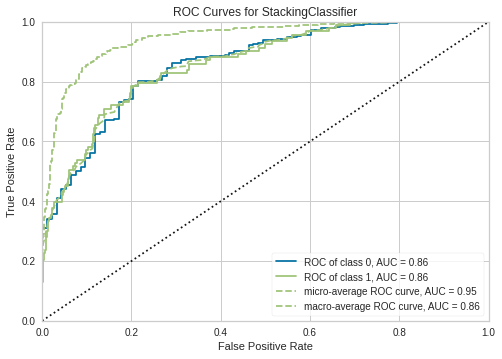

In [42]:
plot_model(stacker)

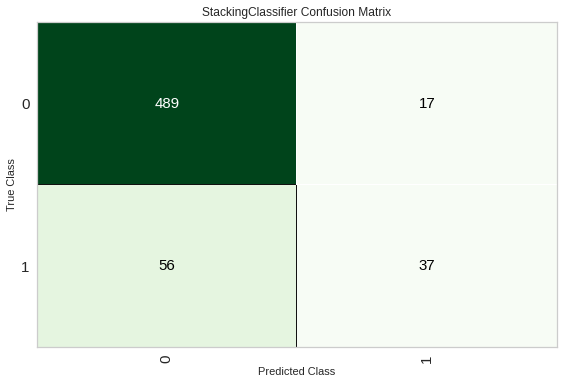

In [43]:
plot_model(stacker, plot = 'confusion_matrix')

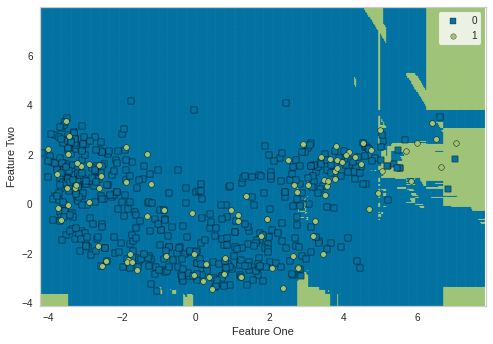

In [44]:
plot_model(stacker, plot = 'boundary')

In [45]:
best = automl(optimize = 'Accuracy')
best

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [46]:
pred_holdouts = predict_model(best)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8715,0.8662,0.7177,0.8628,0.8660,0.4704,0.4737


,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Dt_Customer_weekday_2,Dt_Customer_weekday_3,Dt_Customer_weekday_4,Dt_Customer_weekday_5,Dt_Customer_weekday_6,Dt_Customer_is_month_end_0,Dt_Customer_is_month_start_1,Response,Label,Score
0,7055.0,1952.0,61010.0,57.0,888.0,0.0,57.0,0.0,0.0,76.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9983
1,7094.0,1975.0,58330.0,87.0,445.0,53.0,213.0,104.0,98.0,151.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9998
2,10448.0,1956.0,46998.0,55.0,172.0,41.0,86.0,45.0,6.0,27.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7321
3,217.0,1956.0,64857.0,78.0,556.0,14.0,717.0,210.0,0.0,43.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.8998
4,6950.0,1958.0,49572.0,25.0,35.0,1.0,16.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0.9978


In [53]:
predict_new = predict_model(stacker, data = df_prediction)
predict_new.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Label,Score
217,4418,1983,Master,Single,89616.0,0,0,2013-02-25,36,671,...,0,0,0,0,0,3,11,1,0,0.7880
218,1092,1980,Graduation,Married,61014.0,0,1,2012-08-11,17,269,...,0,0,0,0,0,3,11,0,0,0.7372
219,1448,1963,Master,Married,33562.0,1,2,2014-06-25,33,21,...,0,0,0,0,0,3,11,0,0,0.9907
220,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,0,0,0,0,0,3,11,0,1,0.6561
221,4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,...,0,0,0,0,0,3,11,0,0,0.9703


In [58]:
predict_new['result'] = predict_new['Response'] == predict_new['Label']
predict_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Label,Score,result
0,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,3,11,0,0,0.9614,True
1,2569,1987,Graduation,Married,17323.0,0,0,2012-10-10,38,3,...,0,0,0,0,3,11,0,0,0.9824,True
2,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,0,1,0,0,3,11,0,0,0.8842,True
3,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,...,0,0,0,0,3,11,0,0,0.9789,True
4,1409,1951,Graduation,Together,40689.0,0,1,2013-03-18,69,270,...,0,0,0,0,3,11,0,0,0.9854,True


In [57]:
lost = predict_new[predict_new['result'] == False]['result'].count()
# won = predict_new[predict_new['result'] == True]['result'].count()
# end_result = won / (won + lost)

# print(f"Right predictions: {won}")
# print(f"Wrong predictions: {lost}")
# print(f"End result in % of the predictions: {end_result}")

KeyError: 'result'

In [48]:
save_model(best, model_name='stacker-classifier-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Response',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('dummy', Dummify(target='Response')),
                 ('fix_perfect', Remove_100(target='Response')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                